In [7]:
%matplotlib inline

tau=10m


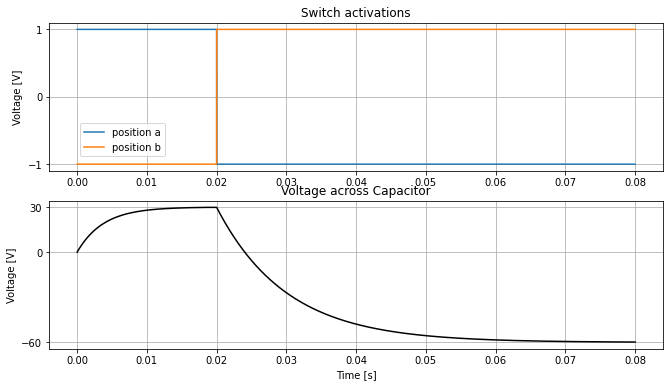

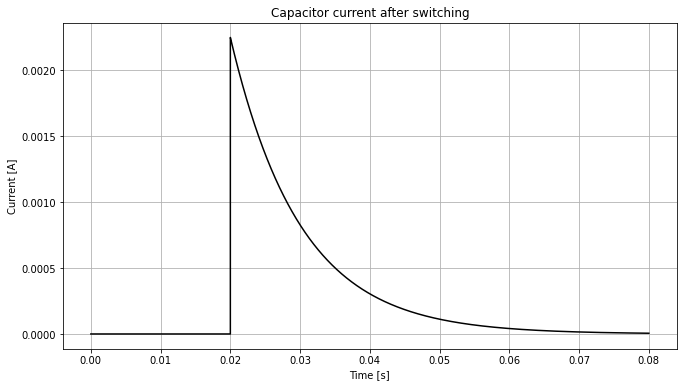

tau=34.75m


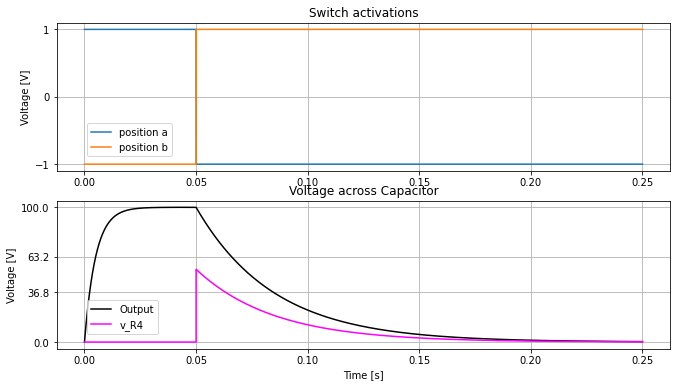

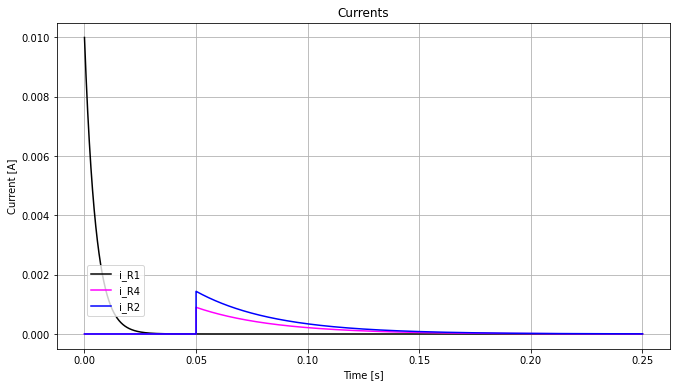

In [8]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import numpy as np

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

import math
from engineering_notation import EngNumber

#####################################################################
circuit = Circuit('Step Response of RC Circuit')

steptime=1@u_us
switchingtime=20@u_ms
finaltime = 80@u_ms

circuit.model('switch', 'SW', Ron=1@u_mΩ, Roff=1@u_GΩ)

circuit.PulseVoltageSource(3, 'posa', circuit.gnd,initial_value=1, pulsed_value=-1,
                           pulse_width=finaltime, period=finaltime, delay_time=switchingtime)
circuit.R('testa', 'posa', circuit.gnd, 1@u_kΩ)

circuit.PulseVoltageSource(4, 'posb', circuit.gnd,initial_value=-1, pulsed_value=1,
                           pulse_width=finaltime, period=finaltime, delay_time=switchingtime)
circuit.R('testb', 'posb', circuit.gnd, 1@u_kΩ)

circuit.V(1, 1, circuit.gnd,   40@u_V)
circuit.R(1, 1, 'a',          20@u_kΩ)
circuit.R(2, 'a', circuit.gnd, 60@u_kΩ)
circuit.VoltageControlledSwitch(1, 'a', 'output','posa', circuit.gnd, model='switch')
circuit.C(1, 'output', circuit.gnd, 0.25@u_uF)
circuit.VoltageControlledSwitch(2, 'output', 'b', 'posb', circuit.gnd, model='switch')
circuit.R(3, 'b', 2,           8@u_kΩ)
circuit.R(4, 2, circuit.gnd, 160@u_kΩ)
circuit.R(5, 2, 3,            40@u_kOhm)
circuit.V(2, circuit.gnd, 3,   75@u_V)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
ic=0@u_V
simulator.initial_condition(output=ic)
analysis = simulator.transient(step_time=steptime, end_time=finaltime)

#######################################################################
tau =(circuit.C1.capacitance)*(circuit.R3.resistance +
                                 (circuit.R4.resistance)*(circuit.R5.resistance)
                                 /(circuit.R4.resistance+ circuit.R5.resistance))
print('tau={0}'.format(EngNumber(tau.value)))


####################################################################
figure = plt.subplots(figsize=(11, 6))

axe = plt.subplot(211)
plt.title('Switch activations')
#plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['posa'], axis=axe)
plot(analysis['posb'], axis=axe)
plt.legend(('position a', 'position b'), loc=(.05,.1))
axe.set_yticks([-1, 0, 1])

axe = plt.subplot(212)
plt.title('Voltage across Capacitor')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['output'], axis=axe, color='black')
#plt.legend(('Voltage'), loc=(.05,.1))
axe.set_yticks([-60, 0, 30])
cursor = Cursor(axe, useblit=True, color='red', linewidth=1)


figure, axe= plt. subplots(figsize=(11, 6))
plt.title('Capacitor current after switching')
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.grid()
plot((analysis['b']-analysis['2'])/circuit.R3.resistance, axis=axe, color='black')

plt.show()


#####################################################################
#####################################################################

import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import numpy as np

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

import math
from engineering_notation import EngNumber

#####################################################################
# CIRCUIT NETLIST
circuit = Circuit('Natural Response of RC Circuit')

steptime=1@u_us
switchingtime=50@u_ms
finaltime = 250@u_ms

circuit.model('switch', 'SW', Ron=1@u_mΩ, Roff=1@u_GΩ)

circuit.PulseVoltageSource(2, 'posa', circuit.gnd,initial_value=1, pulsed_value=-1,
                           pulse_width=finaltime, period=finaltime, delay_time=switchingtime)
circuit.R('testa', 'posa', circuit.gnd, 1@u_kΩ)

circuit.PulseVoltageSource(3, 'posb', circuit.gnd,initial_value=-1, pulsed_value=1,
                           pulse_width=finaltime, period=finaltime, delay_time=switchingtime)
circuit.R('testb', 'posb', circuit.gnd, 1@u_kΩ)


circuit.V(1, 1, circuit.gnd,   100@u_V)
circuit.R(1, 1, 'a',           10@u_kΩ)
circuit.VoltageControlledSwitch(1, 'a', 'output','posa', circuit.gnd, model='switch')
circuit.C(1, 'output', circuit.gnd, 0.5@u_uF)
circuit.VoltageControlledSwitch(2, 'output', 'b', 'posb', circuit.gnd, model='switch')
circuit.R(2,'b', 2,           32@u_kΩ)
circuit.R(3, 2, circuit.gnd, 100@u_kΩ)
circuit.R(4, 2, circuit.gnd, 60@u_kOhm)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
ic=0@u_V
simulator.initial_condition(output=ic)
analysis = simulator.transient(step_time=steptime, end_time=finaltime)

#######################################################################

tau =(circuit.C1.capacitance)*(circuit.R2.resistance +
                                 (circuit.R3.resistance)*(circuit.R4.resistance)
                                 /(circuit.R3.resistance+ circuit.R4.resistance))
print('tau={0}'.format(EngNumber(tau.value)))


######################################################################

figure = plt.subplots(figsize=(11, 6))

axe = plt.subplot(211)
plt.title('Switch activations')
#plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['posa'], axis=axe)
plot(analysis['posb'], axis=axe)
plt.legend(('position a', 'position b'), loc=(.05,.1))
axe.set_yticks([-1, 0, 1])

axe = plt.subplot(212)
plt.title('Voltage across Capacitor')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['output'], axis=axe,  color='black')
plot(analysis['2'], axis=axe, color='magenta')
plt.legend(('Output', 'v_R4'), loc=(.05,.1))
axe.set_yticks([0, 100-(100/math.exp(1)), 100/math.exp(1), 100])
cursor = Cursor(axe, useblit=True, color='red', linewidth=1)


figure, axe= plt. subplots(figsize=(11, 6))
plt.title('Currents')
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.grid()
plot((analysis['1']-analysis['a'])/circuit.R1.resistance, axis=axe, color='black')
plot(analysis['2']/circuit.R4.resistance, axis=axe, color='magenta')
plot((analysis['b']-analysis['2'])/circuit.R2.resistance, axis=axe, color='blue')
plt.legend(('i_R1', 'i_R4', 'i_R2'), loc=(.05,.1))
#axe.set_yticks([-1, 0, 1])
#cursor = Cursor(axe, useblit=True, color='red', linewidth=1)
#plt.tight_layout()
plt.show()
